In [2]:
from scipy.integrate import odeint
import numpy as NP;
from pylab import figure, plot, xlabel, ylabel, legend, title, savefig
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d




##  @brief      This class is designed to produce numerical simulations of
#               trajectories in the standard Schnakenberg ODE system:
#               \f$ \frac{du}{dt}(t) = a - u(t) + u^2(t)v(t) \f$
#               \f$ \frac{dv}{dt}(t) = b - u^2(t)v(t) \f$, for a given set of
#               parameters.
class StandardSchnakenbergSimulator:
    
    ##  @brief              The constructor of this class.
    #   @param  a           This must be a value of type double, which
    #                       corresponds to the value of the a coefficient
    #                       which will be used in the governing equation:
    #                       \f$ \frac{du}{dt}(t) = a - u(t) + u^2(t)v(t) \f$.
    #   @param  b           This must be a value of type double, which
    #                       corresponds to the value of the b coefficient
    #                       which will be used in the govenring equation:
    #                       \f$ \frac{dv}{dt}(t) = b - u^2(t)v(t) \f$.
    #   @param t_values     This must be an array of type double, whose 
    #                       entries are all >=0. This argument corresponds
    #                       to the values in time at which we which we wish
    #                       to determine the value of u(t) and v(t) in our
    #                       trajectory simulations.
    #   @param  atol        This is an optional parameter which corresponds
    #                       to the absolute tolerance used by the ODE solver
    #                       for simulating trajectories. For more details,
    #                       please consult the funciton odeint.
    #   @param  rtol        This is an optional parameter which corresponds to
    #                       the absolute tolerance used by the ODE solver for
    #                       simulating trajectories. For more details,
    #                       please consult the function odeint.
    def __init__(self, a, b, t_values, atol=None, rtol=None):
        self.__a = a;
        self.__b = b;
        self.__t_values = t_values;
        self.__abserr = atol;
        self.__relerr = rtol;
        
        self.__f = lambda y, t: (self.__a - y[0] + (y[0]**2) * y[1], 
                                 self.__b - (y[0]**2) * y[1]);

    ##  @brief      This function produces a simulation of a trajectory in
    #               the standard Schnakenberg ODE system, for a given set of 
    #               initial conditions.    
    #   @param u0   This must be a value of type double, which corresponds to
    #               the initial condition for the u variable at time 0, that
    #               we wish to use for the trajectory simulation.    
    #   @param v0   This must be a value of type double, which corresponds to 
    #               the initial condition for the v variable at time 0, that
    #               we wish to use for the trajectory simulation.    
    #   @return     This function returns two arrays of size n, where n
    #               is used to denote the length of the t_values array given
    #               to the constructor of this class. The first of these
    #               arrays corresponds to the values of u attained on the
    #               requested trajectory at the time values specified in the
    #               t_values array given to the constructor of this class.
    #               The second of these arrays corresponds to the value of v
    #               attained on the requested trajectory at the time values
    #               specified in the t_values array given to the constructor
    #               of this class.
    def generateTrajectory(self, u0, v0):
        sol = odeint(self.__f, [u0,v0], self.__t_values,
                     atol=self.__abserr, rtol=self.__relerr);
   
        u_sol = sol[:,0];
        v_sol = sol[:,1];
    
        return (u_sol, v_sol);

In [3]:
# Parameter values for the kinetics.
a=9
b=2


In [4]:
# Compute the corresponding fixed point values for the system.
u_fixed = b+a;
v_fixed = b/((b+a)**2);

In [5]:
# The time values at which we wish to compute the values of the trajectories.
t_values = NP.linspace(0, 2, num=300);

In [6]:
# Create a trajectory simulator object.
trajectory_simulator = StandardSchnakenbergSimulator(a, b, t_values, 
                                                     atol = 1.0e-8,
                                                     rtol = 1.0e-6);

In [7]:
# Simulate trajectories for the standard Schnakenberg system, using
# several different initial conditons.
u0_values = [1,3,20];
v0_values = [5,10,3];
u_sol_1, v_sol_1 = trajectory_simulator.generateTrajectory(u0_values[0], 
                                                         v0_values[0]);
u_sol_2, v_sol_2 = trajectory_simulator.generateTrajectory(u0_values[1],
                                                         v0_values[1]);
u_sol_3, v_sol_3 = trajectory_simulator.generateTrajectory(u0_values[2],
                                                         v0_values[2]);

In [8]:
# The style, colour and name settings for each line in the subsequent plots.
line_colours = ['r', 'g', 'b', 'y'];
line_styles = ['-', '-', '-', '--'];
line_settings = list(map(lambda x,y: x+y, line_colours, line_styles));
legend_strings = ['$u_0 = '+str(u0_values[0])+', v_0 = '+str(v0_values[0])+'$',
        '$u_0 = '+str(u0_values[1])+', v_0 = '+str(v0_values[1])+'$',
        '$u_0 = '+str(u0_values[2])+', v_0 = '+str(v0_values[2])+'$',
        '$u_0 = u_*, v_0 = v_*$'];

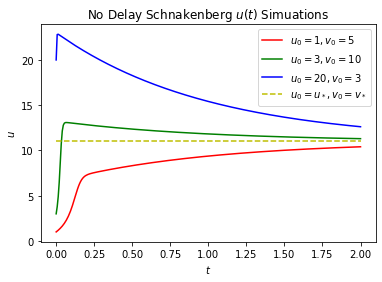

In [9]:
# Plot the u values over time.
figure(1);
xlabel('$t$');
ylabel('$u$');
plot(t_values, u_sol_1, line_settings[0]);
plot(t_values, u_sol_2, line_settings[1]);
plot(t_values, u_sol_3, line_settings[2]);
plot(t_values, NP.ones((len(t_values),1)) * u_fixed, line_settings[3]);
legend(legend_strings);
title("No Delay Schnakenberg $u(t)$ Simuations");

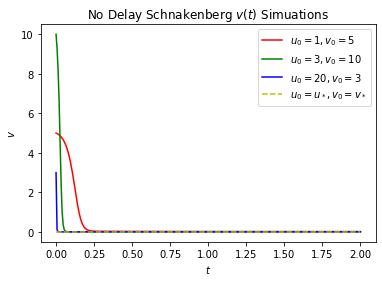

In [10]:
# Plot the v values over time.
figure(2);
xlabel('$t$');
ylabel('$v$');
plot(t_values, v_sol_1, line_settings[0]);
plot(t_values, v_sol_2, line_settings[1]);
plot(t_values, v_sol_3, line_settings[2]);
plot(t_values, NP.ones((len(t_values),1)) * v_fixed, line_settings[3]);
legend(legend_strings);
title("No Delay Schnakenberg $v(t)$ Simuations");

Text(0.5, 1.0, 'No Delay Schnakenberg Trajectories')

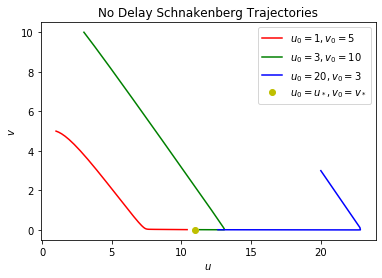

In [11]:
# Plot the trajectory curves in 2D.
figure(3);
xlabel('$u$');
ylabel('$v$');
plot(u_sol_1, v_sol_1, line_settings[0]);
plot(u_sol_2, v_sol_2, line_settings[1]);
plot(u_sol_3, v_sol_3, line_settings[2]);
plot([u_fixed], [v_fixed], line_colours[3]+'o');
legend(legend_strings);
title("No Delay Schnakenberg Trajectories")

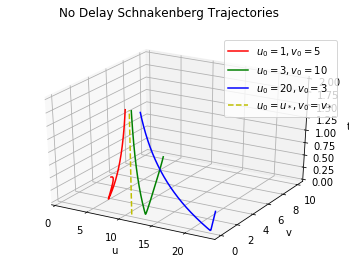

In [12]:
# Plot the trajecotry curves in 3D.
fig = plt.figure(4);
ax = plt.axes(projection='3d');
ax.set_xlabel('u');
ax.set_ylabel('v');
ax.set_zlabel('t');
ax.plot(u_sol_1, v_sol_1, t_values, line_settings[0]);
ax.plot(u_sol_2, v_sol_2, t_values, line_settings[1]);
ax.plot(u_sol_3, v_sol_3, t_values, line_settings[2]);
ax.plot(NP.ones((len(t_values), 1)) * u_fixed,
        NP.ones((len(t_values), 1)) * v_fixed,
        t_values, line_settings[3])
legend(legend_strings);
fig.suptitle('No Delay Schnakenberg Trajectories');